# Impact Analysis and Predictive Modeling of Traffic Accident Severity in the United States

## Introduction

Traffic accidents pose a significant public safety challenge, exacerbated by growing urbanization and the surge in vehicles. The National Highway Traffic Safety Administration's 2013 report highlights approximately 5 million annual traffic accidents in the U.S., with profound health, socioeconomic, and resource implications. To counteract these incidents, U.S. researchers have been probing factors that contribute to accident severity and crafting real-time predictive models for prevention.

The efficacy of Machine Learning (ML) in gauging traffic accident severity is becoming apparent, thanks to its advanced data handling and analysis of complex relationships (Yassin and Pooja, 2020). This study zeroes in on the principal factors affecting accident severity—location, weather, traffic infrastructure, and sunlight conditions—and leverages ML to predict and classify accident severity. The findings are intended to inform policymakers and traffic authorities, aiding in the strategic enhancement of traffic safety measures.s.y.

## Literature review

Scholars have conducted insightful analyses on traffic accident severity from various perspectives. Moosavi et al. (2019a) pioneered the creation of the "US-Accidents" database, offering critical insights into accident characteristics and spatiotemporal patterns. Their research provided valuable tools for accident analysis and prediction. Additionally, they developed the Deep Accident Prediction (DAP) model, improving real-time accident prediction by considering temporal and spatial factors.

Ahmed et al. (2023) used machine learning to predict accident severity, identifying Random Forest as the optimal classifier. They employed Shapley value analysis to explain feature contributions and interactions, revealing the impact of road category and vehicle count on injury severity;Ahmad et al. (2019) analyzed Pakistan's highway accident data, finding speeding, wrong-way driving, and weather conditions as significant severity factors. Their study underscores the importance of managing these risk factors to mitigate societal and economic impacts;Md Abu Sufian and Varadarajan conducted a comprehensive study on UK road accidents, employing machine learning and econometric techniques. Their findings highlight the influence of seasonal variations and environmental conditions on accident severity.

In conclusion, research on accident severity involves database analysis, statistical methods, and predictive modeling, enhancing our understanding of traffic safety and aiding in risk mitigation.



## Research question 

The severity of injuries is a significant indication that is frequently used to evaluate road safety performance because of the variety of injuries that occur in traffic accidents (Santhosh, Dogra, & Roy, 2021).Thus, the primary inquiry of this research is: To what extent do different variables like weather, distance, and road condition affect the intensity of traffic accidents in the United States?

## Presentation of data 

This dataset contains data on traffic accidents in the contiguous 48 states of the United States from February 2016 to March 2023. Moosavi et al. (2019a) originally compiled the data, which were gathered via APIs from a variety of real-time traffic data sources, including state and federal transportation authorities, law enforcement agencies, and traffic cameras. After 2019, data collection efforts continued, extending the dataset's duration to 2023. 
 
To maximize study efficiency, I chose a representative sample of 500,000 accident records from the original 7.7 million records. This subset accurately captures the dataset's properties while eliminating the time constraints that come with evaluating the complete dataset.

The dataset contains 46 fields, each representing a different attribute of traffic accidents in neighbouring regions of the United States.

In [1]:
# Basic data handling and numerical operations
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Machine Learning: Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, GridSearchCV
from sklearn.utils import resample

# Machine Learning: Models
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Machine Learning: Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import roc_curve, precision_recall_curve, average_precision_score

import re
from sklearn.preprocessing import label_binarize

import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings('ignore', category=FutureWarning)  
warnings.filterwarnings("ignore", category=ConvergenceWarning)  

df1 = pd.read_csv("US_Accidents_March23.csv")

#### Basic Attributes
- **ID, Source, and Description**
- **Severity**
- **Start_Time and End_Time**

#### Location Attributes
- **Start_Lat, Start_Lng, End_Lat, End_Lng**
- **Street, City, County, State, Zipcode, Country, Timezone**

#### Weather Attributes
- **Airport_Code, Weather_Timestamp**
- **Temperature(F), Wind_Chill(F), Humidity(%), Pressure(in), Visibility(mi), Wind_Direction, Wind_Speed(mph), Precipitation(in), Weather_Condition**

#### Traffic Facility Attributes
- **Distance(mi)**
- **Amenity, Bump, Crossing, Give_Way, Junction, No_Exit, Railway, Roundabout, Station, Stop, Traffic_Calming, Traffic_Signal, Turning_Loop**

#### Sunlight Attributes
- **Sunrise_Sunset, Civil_Twilight, Nautical_Twilight, Astronomical_Twilight**

## Methodology


### Data validation and cleaning

#### 1.Missing and Duplicated Value

We began by analyzing the dataset's missing values, identifying that "End_Lat" and "End_Lng" had the highest incidence of missing data. To ensure the integrity of our analysis, rows with missing values were removed using dropna().

<Axes: >

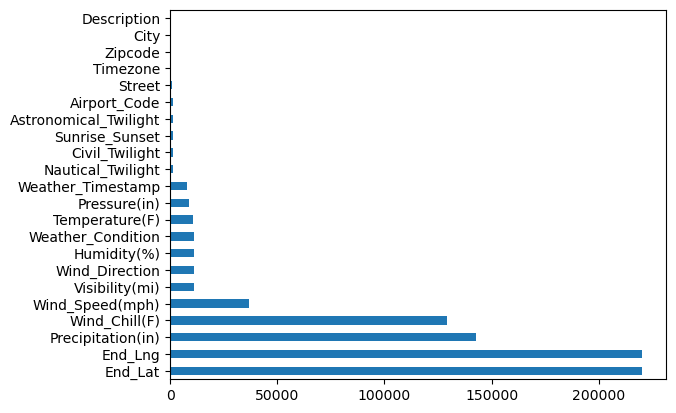

In [2]:
# Missing values
data_preprocessed_df = df1.copy()
missing_values = data_preprocessed_df.isnull().sum().sort_values(ascending=False)
missing_values[missing_values !=0].plot(kind="barh")

In [3]:
df_0 = data_preprocessed_df.dropna()
df_0.isnull().sum()

ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
S

In [4]:
df_0.duplicated().sum()

0

#### 2.Data Formatting

##### Standardize Date Data
First, locate and sort the date and time data that is formatted appropriately. Next, look for any incorrectly structured date and time data. Lastly, combine all of the date and time data and organize it into a neat data frame. 

In [5]:
# Define a regular expression to match the correct date format
date_pattern = r'^\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}$'
# Filter rows that match the regular expression
df_correct_format = df_0[(df_0['Start_Time'].str.match(date_pattern)) & 
                         (df_0['End_Time'].str.match(date_pattern))]

# Filter rows that do not match the format and convert their time format
# Filter rows that do not match the regular expression
df_incorrect_format = df_0[~(df_0['Start_Time'].str.match(date_pattern)) | 
                           ~(df_0['End_Time'].str.match(date_pattern))]
df_incorrect_format

# Use a regular expression to remove the decimal point and the numbers that follow
df_incorrect_format.loc[:, 'Start_Time'] = df_incorrect_format['Start_Time'].str.replace(r'\.\d+', '', regex=True)
df_incorrect_format.loc[:, 'End_Time'] = df_incorrect_format['End_Time'].str.replace(r'\.\d+', '', regex=True)

# Concatenate the two dataframes to form the final dataframe
df_1 = pd.concat([df_correct_format, df_incorrect_format], ignore_index=True)

# Sort by start time
df_1 = df_1.sort_values(by='Start_Time')

# Reset the index
df_1 = df_1.reset_index(drop=True)
df_1['Start_Time'] = pd.to_datetime(df_1['Start_Time'], errors='coerce')
df_1['End_Time'] = pd.to_datetime(df_1['End_Time'], errors='coerce')


##### Standardizing Latitude and Longitude Data
Round the numerical values of Start_Lat, Start_Lng, End_Lat, and End_Lng in the DataFrame to two decimal places.

In [6]:
# Round the latitude and longitude columns to 2 decimal places
df_1['Start_Lat'] = df_1['Start_Lat'].round(2)
df_1['Start_Lng'] = df_1['Start_Lng'].round(2)
df_1['End_Lat'] = df_1['End_Lat'].round(2)
df_1['End_Lng'] = df_1['End_Lng'].round(2)

##### Standardizing Weather Data
After examining the dataset's meteorological conditions, we simplified them into broader categories for clarity.

In [7]:
print("No. of Weather Conditions:", len(df_1["Weather_Condition"].unique()))
print("\nList of unique weather conditions:", list(df_1["Weather_Condition"].unique()))

No. of Weather Conditions: 86

List of unique weather conditions: ['Fair', 'Light Rain', 'Light Snow', 'Mostly Cloudy', 'Overcast', 'Snow', 'Rain', 'Cloudy', 'Light Drizzle', 'Haze', 'Partly Cloudy', 'Shallow Fog', 'Thunder in the Vicinity', 'T-Storm', 'Light Rain / Windy', 'Light Freezing Rain', 'Fog', 'Blowing Dust', 'Heavy Snow', 'Light Freezing Drizzle', 'Clear', 'Rain / Windy', 'Thunderstorms and Rain', 'Heavy Rain', 'Scattered Clouds', 'Fair / Windy', 'Heavy Rain / Windy', 'Mostly Cloudy / Windy', 'Drizzle', 'Smoke', 'Light Thunderstorms and Rain', 'Light Rain Showers', 'Light Ice Pellets', 'Cloudy / Windy', 'Thunder', 'Heavy Drizzle', 'Light Blowing Snow', 'Light Freezing Fog', 'Ice Pellets', 'Light Rain with Thunder', 'Heavy T-Storm', 'Snow and Sleet', 'Light Snow / Windy', 'Partly Cloudy / Windy', 'N/A Precipitation', 'Wintry Mix', 'Heavy T-Storm / Windy', 'T-Storm / Windy', 'Showers in the Vicinity', 'Thunder / Windy', 'Sand / Dust Whirlwinds', 'Haze / Windy', 'Smoke / Windy'

In [8]:
df_1.loc[df_1["Weather_Condition"].str.contains("Thunder|T-Storm", na=False), "Weather_Condition"] = "Thunderstorm"
df_1.loc[df_1["Weather_Condition"].str.contains("Snow|Sleet|Wintry", na=False), "Weather_Condition"] = "Snow"
df_1.loc[df_1["Weather_Condition"].str.contains("Rain|Drizzle|Shower", na=False), "Weather_Condition"] = "Rain"
df_1.loc[df_1["Weather_Condition"].str.contains("Wind|Squalls", na=False), "Weather_Condition"] = "Windy"
df_1.loc[df_1["Weather_Condition"].str.contains("Hail|Pellets", na=False), "Weather_Condition"] = "Hail"
df_1.loc[df_1["Weather_Condition"].str.contains("Fair", na=False), "Weather_Condition"] = "Clear"
df_1.loc[df_1["Weather_Condition"].str.contains("Cloud|Overcast", na=False), "Weather_Condition"] = "Cloudy"
df_1.loc[df_1["Weather_Condition"].str.contains("Mist|Haze|Fog", na=False), "Weather_Condition"] = "Fog"
df_1.loc[df_1["Weather_Condition"].str.contains("Sand|Dust", na=False), "Weather_Condition"] = "Sand"
df_1.loc[df_1["Weather_Condition"].str.contains("Smoke|Volcanic Ash", na=False), "Weather_Condition"] = "Smoke"
df_1.loc[df_1["Weather_Condition"].str.contains("N/A Precipitation", na=False), "Weather_Condition"] = np.nan

##### Standardizing Wind Direction Data

To simplify the dataset's complex wind direction data, we reduced detailed directions to main ones like "North, South, East, West" by extracting the initial letter of each record. We also accounted for two unique states: "Variable" and "Calm".

In [9]:
df_1["Wind_Direction"].unique()

array(['N', 'SW', 'WSW', 'West', 'NW', 'North', 'NE', 'ESE', 'SSE', 'ENE',
       'NNE', 'WNW', 'South', 'CALM', 'East', 'SE', 'S', 'E', 'VAR', 'W',
       'SSW', 'NNW', 'Variable'], dtype=object)

In [10]:
# First, define a dictionary mapping each initial letter to its corresponding direction
direction_map = {
    'N': 'North',
    'S': 'South',
    'E': 'East',
    'W': 'West',
    'V': 'Variable',  # V typically represents variable wind direction
    'C': 'Calm'       # C typically represents calm wind
}

# Remove rows marked as 'Other', which did not match any direction
df_1 = df_1[df_1['Wind_Direction'] != 'Other']

# Use apply and lambda functions to extract the first letter of each wind direction value and map it to the corresponding direction
df_1['Wind_Direction'] = df_1['Wind_Direction'].apply(lambda x: direction_map.get(x[0], 'Other'))

# Ensure the wind direction data column is in object format
df_1['Wind_Direction'] = df_1['Wind_Direction'].astype('object')

# Display the unique values of the modified wind direction data column
df_1['Wind_Direction'].unique()

array(['North', 'South', 'West', 'East', 'Calm', 'Variable'], dtype=object)

##### Organizing Column Names
To make further analysis easier, use a lambda function and the rename function to apply regular expressions and eliminate extra characters from the column names. 

In [11]:
df_1 = df_1.rename(columns=lambda x: re.sub(r'\(.*?\)', '', x))
print(df_1.columns)

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance', 'Description', 'Street',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature', 'Wind_Chill',
       'Humidity', 'Pressure', 'Visibility', 'Wind_Direction', 'Wind_Speed',
       'Precipitation', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


#### 3.Outlier Detection

##### Detecting Latitude and Longitude Errors
As the geographical location of this dataset is in the United States, it's important to check both latitude and longitude.

In [12]:
# Filter for possible sign errors in latitude and longitude columns
# Assuming northern hemisphere should have positive latitude and western hemisphere should have negative longitude
possible_errors = df_1[((df_1['Start_Lat'] < 0) & (df_1['End_Lat'] > 0)) | 
                       ((df_1['Start_Lat'] > 0) & (df_1['End_Lat'] < 0)) |
                       ((df_1['Start_Lng'] > 0) & (df_1['End_Lng'] < 0)) | 
                       ((df_1['Start_Lng'] < 0) & (df_1['End_Lng'] > 0))]

# Output the dataframe with potential sign errors
possible_errors

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight


### Data Pre-processing

#### 1.Data encoding

##### Addressing Class Imbalance
We have observed a significant class imbalance compared to severity level 2. To address this issue, we will perform undersampling on the records to match the number of severity level 1 records, which represent the minority class. 

In [13]:
# Create a copy of the DataFrame
df_2 = df_1.copy()

# Count the occurrences of each severity level
severity_counts = df_2["Severity"].value_counts()
severity_counts

# Determine the size of the sample for severity level 1
size = len(df_2[df_2["Severity"]==1].index)

# Initialize an empty DataFrame for sampling
x = pd.DataFrame()

# Sample an equal size for each severity level and concatenate them
for i in range(1,5):
    S = df_2[df_2["Severity"]==i]
    x = pd.concat([x,S.sample(size, random_state=42)],axis = 0)

# Update df_2 with the sampled DataFrame
df_2 = x

##### Encoding Categorical Columns
Two data frames were designed to segregate and process categorical and numerical data, enabling the encoding of time-based features and computation of duration. 

In [14]:
df_clean = df_2.copy()
# Select all columns with object data type from df_clean and create df_clean_obj DataFrame
df_clean_obj = df_clean.select_dtypes(include=['object','datetime'])

# Select columns from df_clean that are not of object or datetime64 data type, and create df_clean_num DataFrame
df_clean_num = df_clean.select_dtypes(exclude=['object','datetime64'])  # Exclude datetime as it has no missing values and the filling method is

In [15]:
# Encode daytime and nighttime based on twilight periods
mapping_1 = {'Day': 1, 'Night': 0}
times = ["Civil_Twilight", "Nautical_Twilight", "Astronomical_Twilight", "Sunrise_Sunset"]
df_clean_obj[times] = df_clean_obj[times].replace(mapping_1)  # Encode daytime as 1 and nighttime as 0

# Encode time zones
mapping_2 = {'US/Eastern': 1, 'US/Pacific': 2, 'US/Central': 3, 'US/Mountain': 4}
df_clean_obj[['Timezone']] = df_clean_obj[['Timezone']].replace(mapping_2)  # Convert four major US time zones to numeric values

# Extract year, month, day, hour, and weekday
df_clean_obj['Year'] = df_clean_obj['Start_Time'].dt.year.astype('uint16')  
df_clean_obj['Month'] = df_clean_obj['Start_Time'].dt.strftime('%b').astype('category')  
df_clean_obj['Day'] = df_clean_obj['Start_Time'].dt.day.astype('uint8')  
df_clean_obj['Hour'] = df_clean_obj['Start_Time'].dt.hour.astype('uint8') 
df_clean_obj['Min'] = df_clean_obj['Start_Time'].dt.minute.astype('float32') 
df_clean_obj['Weekday'] = df_clean_obj['Start_Time'].dt.strftime("%a").astype('category')  

# Calculate time duration
time_d='Time_Duration'
df_clean_obj[time_d]=round((df_clean_obj['End_Time']-df_clean_obj['Start_Time'])/np.timedelta64(1,'m'))

In [16]:
## Convert Dtypes for faster processing of dataset
obj_dtypes = {
        'Street':'category',
        'City':'category', 
        'County':'category',
        'State':'category', 
        'Zipcode':'category',
        'Timezone':'uint8',
        'Airport_Code':'category',
        'Weather_Timestamp':'string',
        'Wind_Direction':'category',
        'Weather_Condition':'category',
        'Sunrise_Sunset':'bool',
        'Civil_Twilight':'bool',
        'Nautical_Twilight':'bool', 
        'Astronomical_Twilight':'bool',
        'Start_Time':'datetime64[ns]',
        'End_Time':'datetime64[ns]',
        'Year':'uint16',
        'Day':'uint8',
        'Hour':'uint8',
        'Min': 'uint8',
        'Weekday': 'category',
        'Time_Duration':'float32',
        'Month':'category'}

num_dtypes = { 'Severity':'uint8',
            'Start_Lat': 'float32',
            'Start_Lng': 'float32',
            'Distance': 'float32',
            'Temperature': 'float32',
            'Humidity': 'float32',
            'Pressure': 'float32',
            'Visibility': 'float32',
            'Wind_Speed': 'float32',
            'Amenity':'bool',
            'Bump':"bool",
            'Crossing':'bool',
            'Give_Way':'bool',
            'Junction':'bool',
            'No_Exit':'bool',
            'Railway':'bool',
            'Roundabout':'bool',
            'Station':'bool', 
            'Stop':'bool',
            'Traffic_Calming':'bool',
            'Traffic_Signal':'bool',
             }
df_clean_obj = df_clean_obj.astype(obj_dtypes)
df_clean_num = df_clean_num.astype(num_dtypes)

Combining the cleaned and transformed data.

In [17]:
df_clean = pd.concat([df_clean_num,df_clean_obj],axis = 1)

### Seeing the nullness of all the attributes
df_missing = df_clean.isnull().sum(axis = 0).reset_index()
df_missing.columns = ['columns_name', 'missing_count']
df_missing['missing_ratio'] = df_missing['missing_count']/df_clean.shape[0]
df_missing['data_type'] = [df_clean[col].dtypes for col in df_missing.columns_name[:]]
df_missing_with_null = df_missing.query('missing_ratio > 0').sort_values(by = ['missing_ratio','data_type'], ascending = False)

### Drop rows with any missing values
df_clean = df_clean.dropna()

#### 2.Feature Engineering

##### Feature Selection
Firstly, the correlation heatmap visualizes the correlation among numerical features in the dataset.

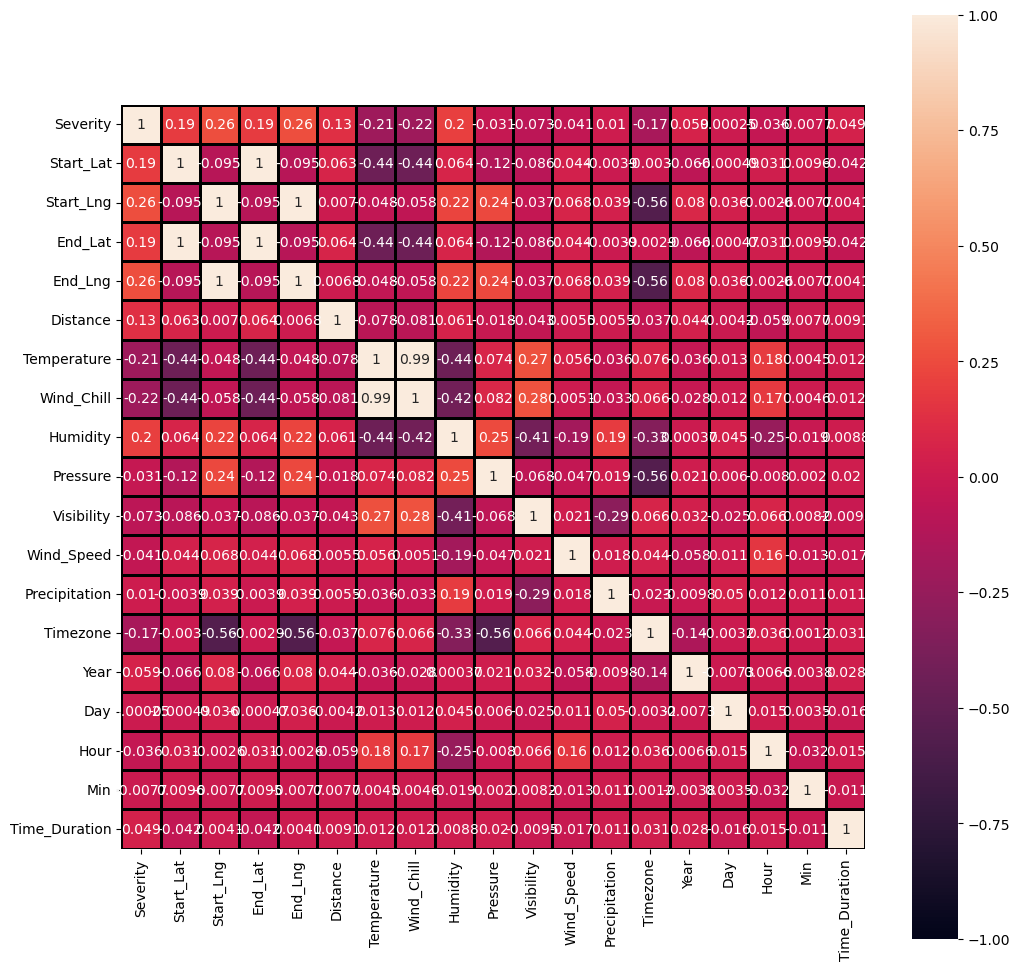

In [18]:
# First, select columns of numeric data type
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns

# Compute the correlation between numeric columns
corr_matrix = df_clean[numeric_cols].corr()

# Set the size of the plot
plt.figure(figsize=(12, 12))

# Plot the correlation heatmap
sns.heatmap(corr_matrix, annot=True, linewidths=1, linecolor='k', square=True,
            mask=False, vmin=-1, vmax=1, cbar_kws={"orientation": "vertical"}, cbar=True)

# Set the hatch style for the cells
plt.gca().patch.set(hatch="X", edgecolor="#666")

# Show the plot
plt.show()

Subsequently, a visualization of the correlation coefficients between numerical features and the target variable is presented using a bar plot. 

/opt/conda/lib/python3.11/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/conda/lib/python3.11/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


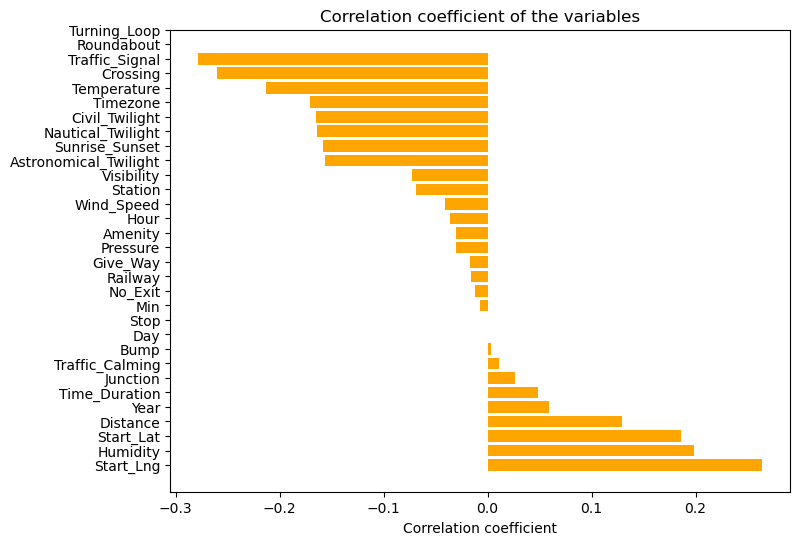

In [19]:
# Selecting numerical features, excluding 'Severity', and choosing appropriate data types
x_cols = [col for col in df_clean.columns if col not in ['Severity'] if df_clean[col].dtype in ['float32', 'uint8', 'bool', 'uint16']]

# Initializing two lists to store feature names and their correlation coefficients with 'Severity'
labels = []
values = []
for col in x_cols:
    labels.append(col)
    # Calculating the correlation coefficient of each feature with 'Severity' and appending it to the list
    values.append(np.corrcoef(df_clean[col].values, df_clean.Severity.values)[0,1])

# Creating a DataFrame to store these values and sorting them in descending order of correlation coefficients
corr_df = pd.DataFrame({'col_labels': labels, 'corr_values': values})
corr_df = corr_df.sort_values(by='corr_values', ascending=False).reset_index(drop=True)

# Using matplotlib to create a horizontal bar plot
ind = np.arange(len(labels))  # Position index
fig, ax = plt.subplots(figsize=(8, 6))  # Setting the figure size
# Drawing the bar plot
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='orange')
ax.set_yticks(ind)  # Setting y-axis ticks
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')  # Setting y-axis labels
ax.set_xlabel("Correlation coefficient")  # Setting x-axis label
ax.set_title("Correlation coefficient of the variables")  # Setting the title
plt.show()  # Displaying the plot



From the observation of the correlation matrix, we will remove features with correlations to severity (Severity) less than or equal to +/- 0.01: 'Bump', 'Day', 'Stop', 'Min'.

In [20]:
# All these less correlated features will be removed
less_corr_features = corr_df[(corr_df.corr_values>=-0.01) & (corr_df.corr_values<=0.01)].col_labels[:]
less_corr = less_corr_features.to_list()
less_corr

['Bump', 'Day', 'Stop', 'Min']

Based on the analysis of the correlation matrix and heatmap, we decided to remove certain attributes:

- **End_Lat** and **End_Lng**: These features are not highly relevant to our task.
- **Wind Chill**: It has low correlation with accident severity and is disregarded.
- **ID** and **Source**: These features do not provide information relevant to accident severity.
- **TMC**: It may already contain information about accident severity, and to prevent information leakage, it is removed.
- **Start_Time** and **End_Time**: These are redundant due to other time-related features already covering relevant information.
- **Description**: It mostly contains the street name of the accident location, hence, it is omitted to simplify the data model.
- **Number**, **Street**, **County**, **State**, **Zipcode**, and **Country**: We focus solely on factors influencing accident occurrence.
- **Timezone**, **Airport_Code**, and **Weather_Timestamp**: They offer minimal assistance in predicting accident severity, hence, they are deleted.
- **Turning_Loop**: This feature remains constant (False) and is not retained.
- **Sunrise_Sunset**, **Nautical_Twilight**, **Astronomical_Twilight**: These features related to daylight have higher correlation with each other than with accident severity.


In [21]:
dropped_cols = less_corr + ['ID','Source','Start_Time','End_Time','Description','Year','Month', 'Hour', 'Weekday',
                            'Street','County','City','Zipcode','State','Airport_Code','Country',
                            'Timezone', 'Airport_Code','Start_Lat', 'Start_Lng',
                            'Turning_Loop','End_Lat','End_Lng',
                            'Sunrise_Sunset', 'Nautical_Twilight', 'Astronomical_Twilight',
                            'Wind_Chill','Weather_Timestamp']
df_clean = df_clean.drop(dropped_cols,axis = 1)
df_clean.columns

Index(['Severity', 'Distance', 'Temperature', 'Humidity', 'Pressure',
       'Visibility', 'Wind_Speed', 'Precipitation', 'Amenity', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Traffic_Calming', 'Traffic_Signal', 'Wind_Direction',
       'Weather_Condition', 'Civil_Twilight', 'Time_Duration'],
      dtype='object')

##### Feature Scaling
To enhance the performance of the model, we normalized the values of continuous features. 

In [22]:
# Select and print the column names of numerical features
num_features = df_clean.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical features:", num_features)

# Select and print the column names of categorical features
cat_features = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical features:", cat_features)

# Select and print the column names of boolean features
bool_features = df_clean.select_dtypes(include=['bool']).columns.tolist()
print("Boolean features:", bool_features)


Numerical features: ['Severity', 'Distance', 'Temperature', 'Humidity', 'Pressure', 'Visibility', 'Wind_Speed', 'Precipitation', 'Time_Duration']
Categorical features: ['Wind_Direction', 'Weather_Condition']
Boolean features: ['Amenity', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Traffic_Calming', 'Traffic_Signal', 'Civil_Twilight']


In [23]:
# Instantiate the scaler
scaler = MinMaxScaler()

# Copy the dataset
df_4 = df_clean.copy()

# List the features to be scaled
features = [ 'Distance', 'Temperature', 'Humidity', 'Pressure', 'Visibility', 'Wind_Speed', 'Precipitation', 'Time_Duration']

# Scale specific features
df_4[features] = scaler.fit_transform(df_4[features])

# View the first few rows of the scaled data
df_4.head()

,Severity,Distance,Temperature,Humidity,Pressure,Visibility,Wind_Speed,Precipitation,Amenity,Crossing,...,No_Exit,Railway,Roundabout,Station,Traffic_Calming,Traffic_Signal,Wind_Direction,Weather_Condition,Civil_Twilight,Time_Duration
23023,1,0.0,0.601695,0.437500,0.941960,0.2,0.130435,0.0,False,True,...,False,False,False,True,False,True,East,Clear,True,0.000013
21724,1,0.0,0.516949,0.447917,0.884872,0.2,0.217391,0.0,False,True,...,False,False,False,False,False,True,West,Cloudy,True,0.000137
20544,1,0.0,0.779661,0.468750,0.907707,0.2,0.217391,0.0,False,True,...,False,False,False,False,False,True,West,Cloudy,True,0.000099
20369,1,0.0,0.644068,0.239583,0.673644,0.2,0.108696,0.0,False,True,...,False,False,False,False,False,False,North,Clear,True,0.000070
26016,1,0.0,0.542373,0.885417,0.921028,0.2,0.304348,0.0,False,False,...,False,False,False,False,False,False,South,Clear,False,0.000042


Converts the data type of each categorical characteristic in the set to category as iteratively goes over each one. Subsequently, boolean values (True and False) are encoded as numerical values (1 and 0) using the replace() method, making it easier to employ them in machine learning models. 

In [24]:
categorical_features = set(['Wind_Direction', 'Weather_Condition'])

for cat in categorical_features:
   df_4[cat] = df_4[cat].astype("category")

X = df_4.replace([True, False], [1, 0])

Now, the get_dummies() method can be used to encode categorical features. 

In [25]:
onehot_cols = list(categorical_features)
X = pd.get_dummies(X, columns=onehot_cols, drop_first=True)

### Comprehensive Analysis

#### 1.Exploratory Data Analysis


##### Spatial Features
The chart illustrates a comparison of total traffic accident counts across major cities in the United States from 2016 to 2023. Miami has the highest number of accidents during these years, followed by Los Angeles. 

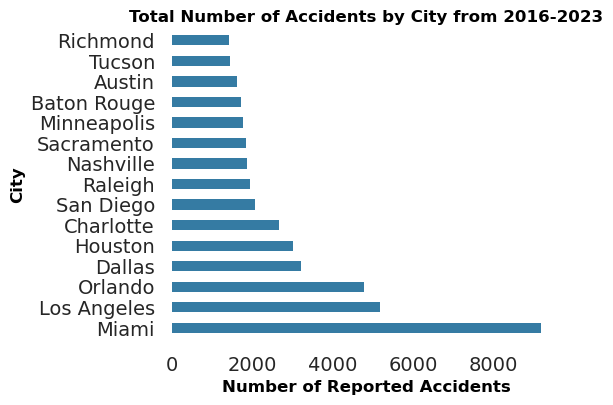

In [26]:
df = df_1
cities = df.City.unique()
counties = df.County.unique()
county_accidents = df.County.value_counts()
city_accidents = df.City.value_counts()

# Total Number of Accidents by City from 2016-2023
# Set the aesthetic style of the plots to a clean and minimalistic background
sns.set(style="white", context="talk")

# Increase the size of the figure for better readability
plt.figure(figsize=(5, 4))

# Plot the horizontal bar plot with a more visually appealing color and without edge lines
ax = city_accidents[:15].plot(kind='barh', color=sns.color_palette("mako", 1), edgecolor='none')

# Enhance the title and axis labels with improved formatting
plt.title('Total Number of Accidents by City from 2016-2023', fontsize=12, weight='bold', color='black')
plt.xlabel('Number of Reported Accidents', fontsize=12, weight='bold', color='black')
plt.ylabel('City', fontsize=12, weight='bold', color='black')

# Customize the tick parameters for a neater presentation
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Remove the top and right spines for a cleaner look, and also remove grid lines
sns.despine(left=True, bottom=True)
plt.grid(False)

# Save the figure to the 'pictures' folder with a descriptive filename and tight layout
plt.savefig('picture/accidents_by_city.png', bbox_inches='tight')

# Show the plot
plt.show()

The pie chart illustrates the distribution of total traffic accident counts across different states in the United States from 2016 to 2023. California (CA) tops the list, accounting for 30% of the total accidents. 

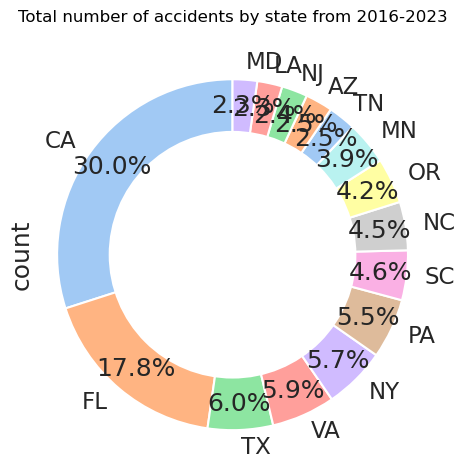

In [27]:
states = df.State.value_counts()

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Pie chart uses a different color palette for better aesthetics
colors = sns.color_palette('pastel')[0:15]

# Creating the pie chart with the provided states data
plt.figure(figsize=(5, 5))
states[:15].plot(kind='pie', colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85)

# Draw a circle at the center to turn the pie into a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Customizing the title with adjusted position
plt.title('Total number of accidents by state from 2016-2023', size=12, color='black', y=1.1)  # Adjust 'size' and 'y' as needed

# Apply tight layout to adjust for plot elements
plt.tight_layout()


# Show the plot
plt.show()


This scatter plot visually represents the distribution of traffic accidents across various states within the United States. The density and range of the colours reveal the frequency of accidents and their distribution within the states.

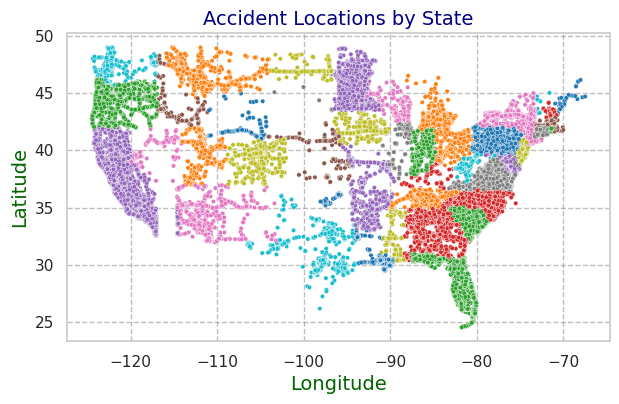

In [28]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure with a specific size
plt.figure(figsize=(7, 4))

# Plot a scatterplot with the specified parameters
scatter = sns.scatterplot(x="Start_Lng", y="Start_Lat", hue="State", data=df, palette="tab10", s=10, legend=False)

# Set the title of the chart with a font size of 18 and color navy
plt.title("Accident Locations by State", fontsize=14, color='navy')

# Label the x-axis as 'Longitude' with a font size of 14 and color dark green
plt.xlabel("Longitude", fontsize=14, color='darkgreen')

# Label the y-axis as 'Latitude' with a font size of 14 and color dark green
plt.ylabel("Latitude", fontsize=14, color='darkgreen')

# Add grid lines to the plot for better readability, with a specific style and alpha transparency
plt.grid(True, linestyle='--', which='both', color='grey', alpha=0.5)

# Display the plot
plt.show()


##### Time Features
This histogram depicts the weekly density of traffic accidents throughout the year. Peaks are observed around the 10th and 50th weeks, which could correlate with holiday periods and seasonal travel patterns. 

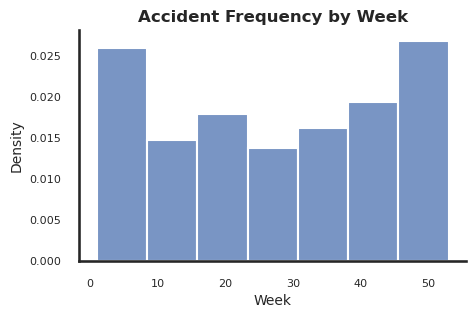

In [29]:
start_time = pd.to_datetime(df['Start_Time'])
end_time = pd.to_datetime(df['End_Time'])
sns.set(style="white", context="talk")

# Plot the histogram with improved aesthetics
plt.figure(figsize=(5, 3))  # 调整图形大小
# Create the histogram plot without KDE, grid lines, and with no edge color around the bars
ax = sns.histplot(start_time.dt.isocalendar().week, bins=7, kde=False, stat="density", edgecolor=None)
ax.set_xlabel('Week', fontsize=10)  # 调整x轴标签大小
ax.set_ylabel('Density', fontsize=10)  # 调整y轴标签大小
plt.title('Accident Frequency by Week', fontsize=12, weight='bold')  # Set the title with a larger font and bolded

# Adjust the font size of the axis tick labels for better readability
ax.tick_params(axis='both', which='major', labelsize=8)  # 调整标签大小

# Remove the grid lines and spines for a cleaner look
sns.despine()

# Save the figure to the 'pictures' folder with a descriptive filename
plt.savefig('picture/accident_frequency_by_week.png', bbox_inches='tight')

# Show the plot
plt.show()

The histograms indicate that the density of accidents on weekdays peaks during daytime hours (approximately from 7 AM to 6 PM), reflecting the impact of rush hour traffic. 

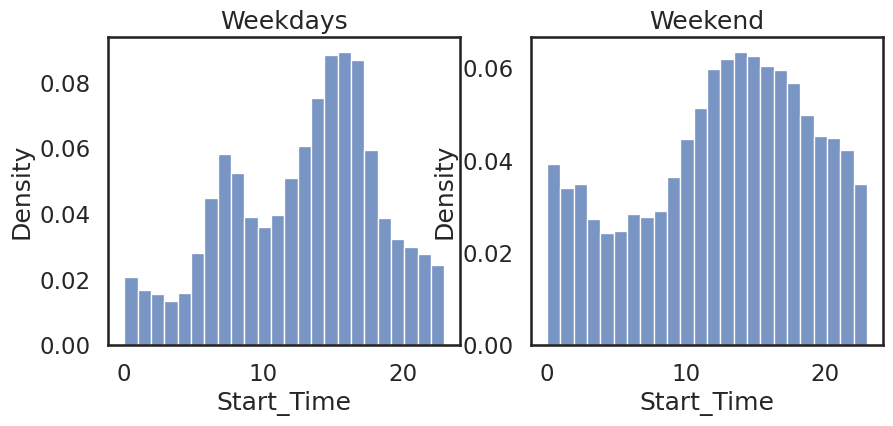

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
weekday_start_time = df["Start_Time"][(df["Start_Time"].dt.day_of_week != 6) & (df["Start_Time"].dt.day_of_week != 5)]
sns.histplot(weekday_start_time.dt.hour, bins=24, kde=False, stat="density", ax=ax[0])
ax[0].set_title('Weekdays')

weekend_start_time = df["Start_Time"][(df["Start_Time"].dt.day_of_week == 6) | (df["Start_Time"].dt.day_of_week == 5)]
sns.histplot(weekend_start_time.dt.hour, bins=24, kde=False, stat="density", ax=ax[1])
ax[1].set_title('Weekend')

plt.subplots_adjust(wspace=0.2)
# plt.show() 

##### Weather Features
The bar chart reveals that the frequency of accidents is highest under clear weather conditions, likely due to the higher volume of vehicles travelling in good weather. 

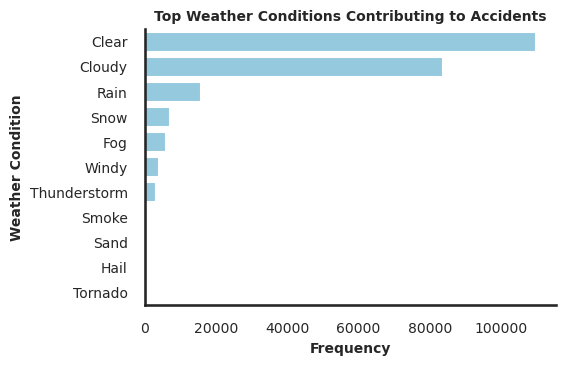

In [31]:
wc = pd.DataFrame(df['Weather_Condition'].value_counts()).reset_index().sort_values(by='count', ascending=False)
wc.rename(columns={'Weather_Condition': 'weather_condition', 'count': 'frequency'}, inplace=True)
fig, ax = plt.subplots(figsize=(6, 4))  
sns.set_style('whitegrid')  
sns.barplot(x='frequency', y='weather_condition', data=wc, color='skyblue', orient='h')
ax.set_xlabel('Frequency', fontsize=10, weight='bold')
ax.set_ylabel('Weather Condition', fontsize=10, weight='bold')
ax.set_title('Top Weather Conditions Contributing to Accidents', fontsize=10, weight='bold')

ax.tick_params(labelsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

The analysis reflects the average severity of traffic accidents under varying weather conditions. The data reveals that accidents in "Hail" conditions have the highest average severity at 2.33. 

In [32]:
#columns 
weather_severity_data = df_1[['Weather_Condition', 'Severity']]
# Group data by weather condition and calculate mean severity
severity_by_weather = weather_severity_data.groupby('Weather_Condition')['Severity'].mean().reset_index()

# Sort data by mean severity
severity_by_weather = severity_by_weather.sort_values(by='Severity', ascending=False)
severity_by_weather

,Weather_Condition,Severity
3,Hail,2.333333
6,Smoke,2.176796
7,Snow,2.102941
4,Rain,2.096606
10,Windy,2.083550
1,Cloudy,2.078575
8,Thunderstorm,2.071383
0,Clear,2.067290
2,Fog,2.064109
5,Sand,2.000000


##### Road Features
The bar chart indicates that 'Crossing' and 'Traffic_Signal' are the most common scenes of accidents. Conversely, 'Roundabout' occurrences are less frequent, which may be attributed to higher costs or planning constraints. 

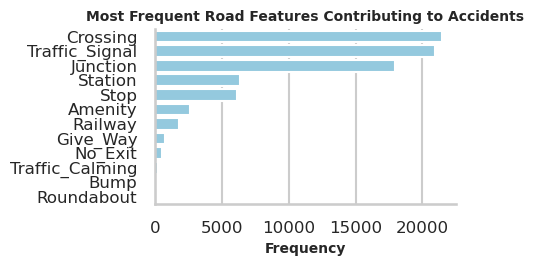

In [33]:
road_features = ["Amenity", "Bump", "Crossing", "Give_Way", "Junction", "No_Exit", "Railway", "Roundabout", "Station", "Stop", "Traffic_Calming", "Traffic_Signal"]

data = df_1[road_features].sum().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(5, 3))  
sns.set_style('whitegrid') 

sns.barplot(x=data.values, y=data.index, color='skyblue', orient="h")

ax.set_title('Most Frequent Road Features Contributing to Accidents', fontsize=10, weight='bold')
ax.set_xlabel('Frequency', fontsize=10, weight='bold')
ax.set_ylabel('')

ax.tick_params(labelsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

plt.show()

 According to the results, accidents near Give_Way signs have the highest average severity, with Junctions and No_Exits following closely after. 

In [34]:
# Calculate the average severity of accidents when each road feature is present
severity_by_feature = df_1[road_features + ['Severity']].melt(id_vars='Severity', var_name='Feature', value_name='Present')
severity_by_feature = severity_by_feature[severity_by_feature['Present'] == True]
average_severity = severity_by_feature.groupby('Feature')['Severity'].mean().reset_index()

# Sort the results by average severity in descending order
average_severity_sorted = average_severity.sort_values(by='Severity', ascending=False)
average_severity_sorted


,Feature,Severity
3,Give_Way,2.128137
4,Junction,2.115123
5,No_Exit,2.089054
9,Stop,2.074513
11,Traffic_Signal,2.071575
6,Railway,2.065510
0,Amenity,2.062500
10,Traffic_Calming,2.051282
2,Crossing,2.039748
8,Station,2.033292


#### 2.Model Analysis


In this study, we assessed various machine learning models to predict traffic accident severity. We began with logistic regression as a baseline for its simplicity. We then explored decision trees, which provide clear decision paths and are good for explanatory analysis. Random forests were used to improve prediction stability and accuracg

We will also fine-tune model hyperparameters to optimize performance. Model effectiveness will be measured using precision, recall, and accuracy metrics.

In [35]:
# Metrics dictionary
accuracy = dict()
precision = dict()
recall = dict()
f1 = dict()
fpr = dict()
tpr = dict()

##### Logistic Regression
 Logistic regression is an effective statistical tool for modelling, evaluating, and addressing multinomial outcomes in datasets. It was chosen as the first model in this case because it may be used as a baseline model that can be continuously optimized and progressed by using more complex algorithms. 

In [36]:
# Create a sample dataset
sample = X
# Separate the target variable 'Severity' for prediction
y_sample = sample["Severity"]
# Remove the target variable column, leaving only feature variables
X_sample = sample.drop("Severity", axis=1)

# Split the dataset into a training set and a validation set
X_train, X_validate, y_train, y_validate = train_test_split(X_sample, y_sample, random_state=42)

# Instantiate a logistic regression model
lr = LogisticRegression(random_state=42, n_jobs=-1)

# Define the hyperparameters to be searched
params = {"solver": ["newton-cg", "sag", "saga"],
          "max_iter": [100, 200, 500, 1000]
         
         }

# Use grid search to find the best hyperparameters
grid = GridSearchCV(lr, params, n_jobs=-1, verbose=0)

# Fit the grid search on the training set
grid.fit(X_train, y_train)

# Print the best parameters found and the corresponding training score
print("Best parameters scores:", grid.best_params_)
print("Training score with the best parameters:", grid.score(X_train, y_train))
print("Validation score with the best parameters:", grid.score(X_validate, y_validate))


Best parameters scores: {'max_iter': 100, 'solver': 'newton-cg'}
Training score with the best parameters: 0.42621925802417676
Validation score with the best parameters: 0.403125


In [37]:
# # View the results of cross-validation
# pd.DataFrame(grid.cv_results_)
lr.fit(X_train, y_train)
# Make predictions on the validation set
y_pred = lr.predict(X_validate)

# Calculate and store the accuracy and F1 score in the respective dictionaries
accuracy = {}
f1 = {}
accuracy["Logistic Regression"] = accuracy_score(y_validate, y_pred)
f1["Logistic Regression"] = f1_score(y_validate, y_pred, average="macro")

# Print the classification report for both the training and validation sets
print("Classification report for the training set:")
print(classification_report(y_train, lr.predict(X_train)))
print("Classification report for the validation set:")
print(classification_report(y_validate, y_pred))

/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification report for the training set:
              precision    recall  f1-score   support

           1       0.57      0.49      0.53      1166
           2       0.36      0.46      0.40      1220
           3       0.40      0.39      0.39      1221
           4       0.42      0.37      0.40      1191

    accuracy                           0.43      4798
   macro avg       0.44      0.43      0.43      4798
weighted avg       0.44      0.43      0.43      4798

Classification report for the validation set:
              precision    recall  f1-score   support

           1       0.63      0.51      0.56       435
           2       0.31      0.43      0.36       380
           3       0.34      0.34      0.34       380
           4       0.38      0.32      0.35       405

    accuracy                           0.40      1600
   macro avg       0.42      0.40      0.40      1600
weighted avg       0.42      0.40      0.41      1600



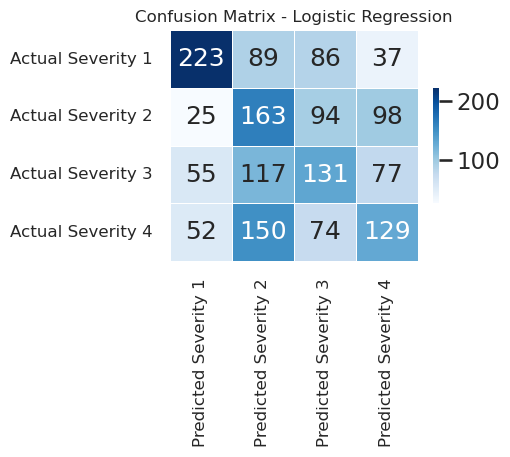

In [38]:
# Make predictions on the validation set using the logistic regression model
y_pred = lr.predict(X_validate)
# Calculate the confusion matrix
confmat = confusion_matrix(y_true=y_validate, y_pred=y_pred)

# Define the index and column names for the confusion matrix DataFrame
index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
# Create a DataFrame from the confusion matrix
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Confusion Matrix - Logistic Regression", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

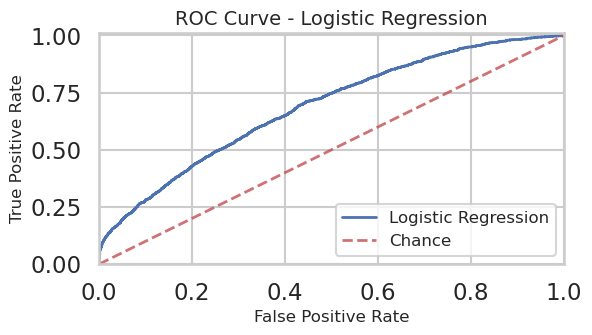

In [39]:
Y = label_binarize(y_validate, classes=[1, 2, 3, 4])

y_score = lr.predict_proba(X_validate)

precision["Logistic Regression"], recall["Logistic Regression"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["Logistic Regression"], tpr["Logistic Regression"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(6, 3))
plt.step(fpr["Logistic Regression"], tpr["Logistic Regression"], where="post", linewidth=2, label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
plt.title("ROC Curve - Logistic Regression", fontsize=14)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()

##### Decision Tree
Decision trees are used to delve deeper into the underlying structure of the data and improve prediction performance. Decision tree models can handle non-linear relationships, and given the complexity of the data in this study, decision trees may provide stronger prediction capabilities. Compared to the logistic regression model, the decision tree presents the data's decision path in a more intuitive way. 

In [40]:
sample = X
y_sample = sample["Severity"]
X_sample = sample.drop("Severity", axis=1)

X_train, X_validate, y_train, y_validate = train_test_split(X_sample, y_sample, random_state=42)
dtc = DecisionTreeClassifier(random_state=42)
parameters = [{"criterion": ["gini", "entropy"], "max_depth": [5, 10, 15, 30]}]
grid = GridSearchCV(dtc, parameters, verbose=0, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters scores:",grid.best_params_)
print("Train score:", grid.score(X_train, y_train))
print("Validation score:", grid.score(X_validate, y_validate))

Best parameters scores: {'criterion': 'entropy', 'max_depth': 5}
Train score: 0.6365152146727803
Validation score: 0.61


In [41]:
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_validate)

accuracy["Decision Tree"] = accuracy_score(y_validate, y_pred)
f1["Decision Tree"] = f1_score(y_validate, y_pred, average="macro")

print(classification_report(y_train, dtc.predict(X_train)))
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1166
           2       1.00      1.00      1.00      1220
           3       1.00      1.00      1.00      1221
           4       1.00      1.00      1.00      1191

    accuracy                           1.00      4798
   macro avg       1.00      1.00      1.00      4798
weighted avg       1.00      1.00      1.00      4798

              precision    recall  f1-score   support

           1       0.75      0.71      0.73       435
           2       0.56      0.54      0.55       380
           3       0.51      0.54      0.52       380
           4       0.48      0.49      0.49       405

    accuracy                           0.57      1600
   macro avg       0.57      0.57      0.57      1600
weighted avg       0.58      0.57      0.58      1600



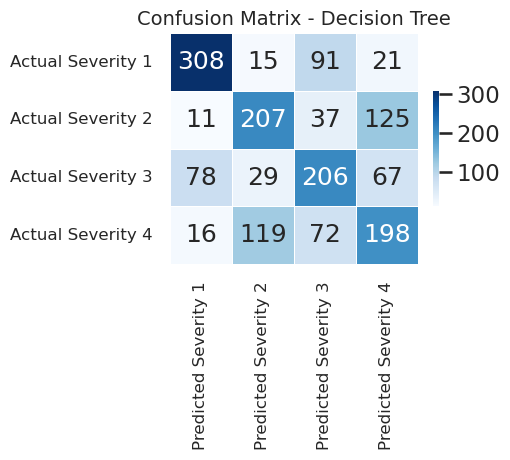

In [42]:
y_pred = dtc.predict(X_validate)
confmat = confusion_matrix(y_true=y_validate, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)

plt.figure(figsize=(4, 3))  # Larger figure size
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=.5, cbar_kws={"shrink": .5})  # Changed color map, added line widths and adjusted color bar
plt.title("Confusion Matrix - Decision Tree", fontsize=14)  # Increased title font size
plt.xticks(fontsize=12)  # Larger x-axis labels
plt.yticks(fontsize=12)  # Larger y-axis labels
plt.show()

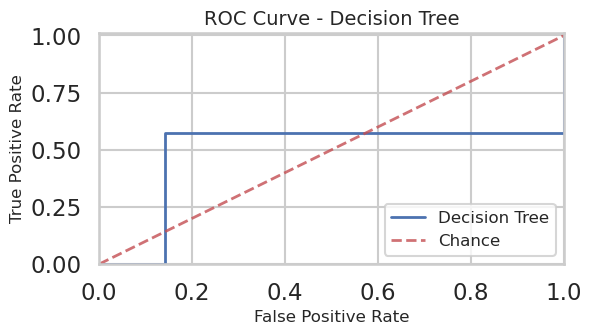

In [43]:
Y = label_binarize(y_validate, classes=[1, 2, 3, 4])

y_score = dtc.predict_proba(X_validate)

precision["Decision Tree"], recall["Decision Tree"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["Decision Tree"], tpr["Decision Tree"], _ = roc_curve(Y.ravel(), y_score.ravel())

# Set the style of seaborn
sns.set_style("whitegrid")

# Create a larger figure for easier viewing
plt.figure(figsize=(6, 3))

# Create the ROC curve step plot
plt.step(fpr["Decision Tree"], tpr["Decision Tree"], where="post", linewidth=2, label='Decision Tree')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
plt.title("ROC Curve - Decision Tree", fontsize=14)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)

# Adjust the limits of the axes for precision
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()


##### Random Forest

So far, Random Forest has proved to be a good method for road traffic accident injury severity prediction, followed by Decision Trees, Support Vector Machines and K Nearest Neighbour algorithms (Santos, Dias and Amado, 2021).Following basic modelling with logistic regression and decision trees, Random Forests were chosen as the prediction approach in this study to increase the accuracy and stability of the forecasts while learning about the value of the attributes. 


In [44]:
sample = X
y_sample = sample["Severity"]
X_sample = sample.drop("Severity", axis=1)

X_train, X_validate, y_train, y_validate = train_test_split(X_sample, y_sample, random_state=42)

rfc = RandomForestClassifier(n_jobs=-1, random_state=42)
parameters = [{"n_estimators": [50, 100, 200, 500], "max_depth": [5, 10, 15, 30]}]
# grid = GridSearchCV(rfc, parameters, verbose=5, n_jobs=-1)
grid = GridSearchCV(rfc, parameters, verbose=0, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters scores:",grid.best_params_)
print("Train score:", grid.score(X_train, y_train))
print("Validation score:", grid.score(X_validate, y_validate))

Best parameters scores: {'max_depth': 30, 'n_estimators': 200}
Train score: 0.9997915798249271
Validation score: 0.639375


In [45]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_validate)

accuracy["Random Forest"] = accuracy_score(y_validate, y_pred)
f1["Random Forest"] = f1_score(y_validate, y_pred, average="macro")

print(classification_report(y_train, rfc.predict(X_train)))
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1166
           2       1.00      1.00      1.00      1220
           3       1.00      1.00      1.00      1221
           4       1.00      1.00      1.00      1191

    accuracy                           1.00      4798
   macro avg       1.00      1.00      1.00      4798
weighted avg       1.00      1.00      1.00      4798

              precision    recall  f1-score   support

           1       0.77      0.82      0.79       435
           2       0.60      0.59      0.59       380
           3       0.58      0.65      0.62       380
           4       0.58      0.49      0.53       405

    accuracy                           0.64      1600
   macro avg       0.63      0.64      0.63      1600
weighted avg       0.64      0.64      0.64      1600



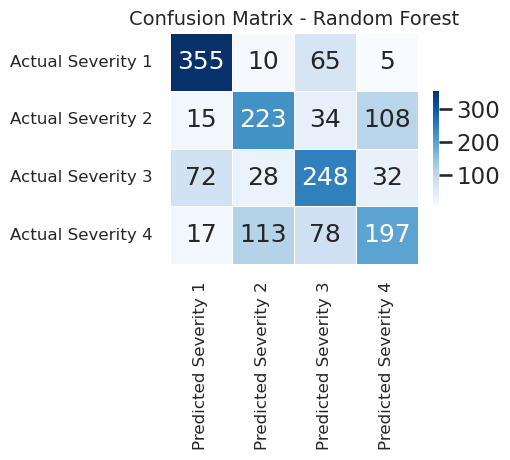

In [46]:
y_pred = rfc.predict(X_validate)
confmat = confusion_matrix(y_true=y_validate, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Confusion Matrix - Random Forest", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

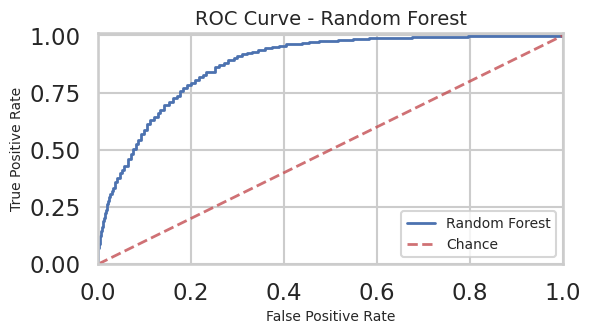

In [47]:
Y = label_binarize(y_validate, classes=[1, 2, 3, 4])

y_score = rfc.predict_proba(X_validate)

precision["Random Forest"], recall["Random Forest"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["Random Forest"], tpr["Random Forest"], _ = roc_curve(Y.ravel(), y_score.ravel())

# Set the style of seaborn
sns.set_style("whitegrid")

# Create a larger figure for easier viewing
plt.figure(figsize=(6, 3))

# Create the ROC curve step plot for Random Forest
plt.step(fpr["Random Forest"], tpr["Random Forest"], where="post", linewidth=2, label='Random Forest')

# Add a line to represent no-skill classifier
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)

# Add title and labels with font size adjustments for Random Forest
plt.title("ROC Curve - Random Forest", fontsize=14)
plt.xlabel("False Positive Rate", fontsize=10)
plt.ylabel("True Positive Rate", fontsize=10)

# Adjust the limits of the axes for precision
plt.xlim([0, 1])
plt.ylim([0, 1.01])

# Add a legend to the plot
plt.legend(loc="lower right", fontsize=10)

# Add grid for easier reading
plt.grid(True)

# Show the plot
plt.show()

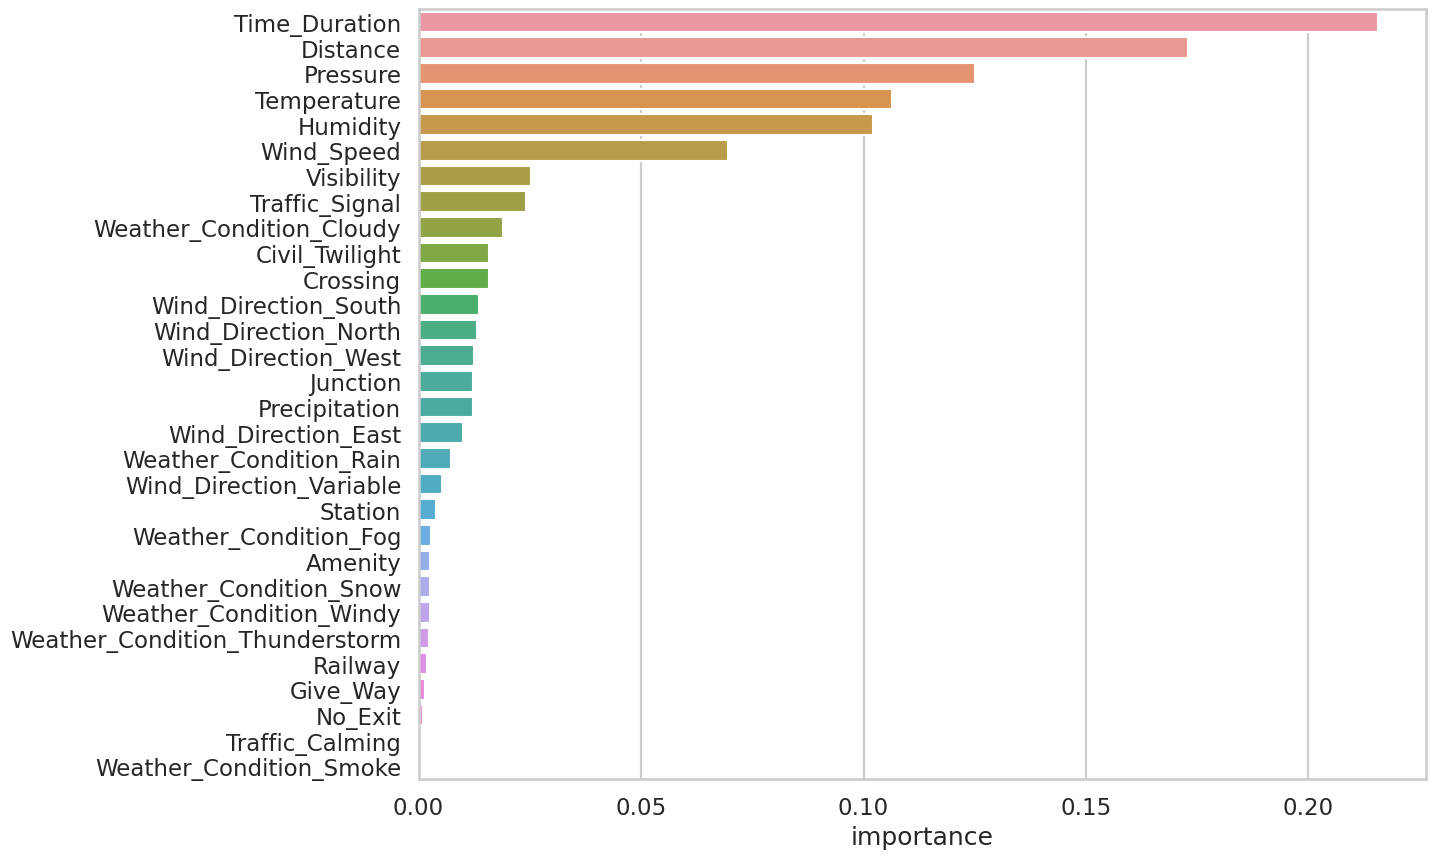

In [48]:
importances = pd.DataFrame(np.zeros((X_train.shape[1], 1)), columns=["importance"], index=X_train.columns)

importances.iloc[:,0] = rfc.feature_importances_

importances = importances.sort_values(by="importance", ascending=False)[:30]

plt.figure(figsize=(13, 10))
sns.barplot(x="importance", y=importances.index, data=importances)
plt.show()

## Results and Discussion

**Visualisation**

(1)Spatial Features
Between 2016 and 2023, Miami had the most traffic accidents of any large city in the United States. California (CA) leads the way in terms of traffic accident distribution by state, accounting for 30% of all traffic accidents. 

(2)Time Features
Traffic accidents peak in the 10th and 50th weeks of the year, coinciding with Christmas and Easter, suggesting that holiday travel may be associated with accidents. Weekday accident densities peak at 7 a.m. and 6 p.m., reflecting a strong correlation with commuting times. Meanwhile, weekend accident densities suggests longer and more dispersed periods of high accident occurrence.

(3)Weather Features
Accident frequency was highest in sunny conditions, which may be due to the higher volume of vehicle traffic in good weather. The average severity of accidents was highest in ‘hail’ conditions, suggesting that accidents during hailstorms may lead to more severe consequences.

(4)Road Features
The most common accident scenarios are crossing and traffic signals, which may be related to the fact that these two categories are also more common. There are fewer crashes at roundabouts, presumably because people are more cautious there. 


**Correlation**

The correlation coefficients of the different variables with the severity of traffic accidents show that most of the variables have relatively small correlation coefficients, indicating that their relationship with accident severity is not very strong.  on the contrary, variables such as Distance and Junction showed a slight negative correlation. Overall, all correlations are weak, indicating that no single factor has a strong direct relationship with accident severity.


**Modeling**

Random Forest models stand out for their ability to predict auto accident severity in the U.S., thanks to their superior performance in handling complex datasets and generalizing beyond the training data. While logistic regression fits well to training data, it falters on the validation set, especially with class 4 predictions. Decision trees, though prone to overfitting, still perform better than logistic regression on unseen data due to their structure-capturing prowess.

In terms of feature importance within the Random Forest model, Time Duration, Distance, and Pressure are paramount for predicting accident severity. Temperature and Humidity are also key, whereas Wind Speed, Visibility, and Traffic Signal, despite being less impactful, contribute to the prediction.

## Conclusion

This study reveals traffic safety patterns, trends, and influencing factors through an in-depth analysis of U.S. traffic crash data from 2016 to 2023. This study provides a relatively comprehensive and accurate prediction of the severity of traffic accidents through multi-perspective data analysis and visualisation, as well as the application of advanced machine learning models such as random forests. In the future, we should consider integrating more data sources and exploring non-linear relationships between variables, as well as other potential influencing factors, in order to provide more accurate data support for traffic safety regulation and action.

## Reference

Ahmad, N., Ahmed, A., Wali, B. and Tariq Usman Saeed (2019). Exploring factors associated with crash severity on motorways in Pakistan. 175(4), pp.189–198. doi:https://doi.org/10.1680/jtran.18.00032.

Ahmed, S., Hossain, M.A., Ray, S.K., Bhuiyan, M.M.I. and Sabuj, S.R. (2023). A study on road accident prediction and contributing factors using explainable machine learning models: analysis and performance. Transportation Research Interdisciplinary Perspectives, [online] 19, p.100814. doi:https://doi.org/10.1016/j.trip.2023.100814.

Md Abu Sufian and Varadarajan, J. (2023). Enhancing Prediction and Analysis of UK Road Traffic Accident Severity Using AI: Integration of Machine Learning, Econometric Techniques, and Time Series Forecasting in Public Health Research. arXiv (Cornell University). doi:https://doi.org/10.48550/arxiv.2309.13483.

Moosavi, S., Samavatian, M.H., Parthasarathy, S. and Ramnath, R. (2019a). A Countrywide Traffic Accident Dataset. arXiv:1906.05409 [cs]. [online] Available at: https://arxiv.org/abs/1906.05409.

Moosavi, S., Samavatian, M.H., Parthasarathy, S., Teodorescu, R. and Ramnath, R. (2019b). Accident Risk Prediction based on Heterogeneous Sparse Data. Proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems - SIGSPATIAL ’19. [online] doi:https://doi.org/10.1145/3347146.3359078.

Santhosh, K.K., Dogra, D.P. and Roy, P.P. (2021). Anomaly Detection in Road Traffic Using Visual Surveillance. ACM Computing Surveys, 53(6), pp.1–26. doi:https://doi.org/10.1145/3417989.

Santos, K., Dias, J.P. and Amado, C. (2021). A literature review of machine learning algorithms for crash injury severity prediction. Journal of Safety Research. doi:https://doi.org/10.1016/j.jsr.2021.12.007.

Yassin, S.S. and Pooja (2020). Road accident prediction and model interpretation using a hybrid K-means and random forest algorithm approach. SN Applied Sciences, 2(9). doi:https://doi.org/10.1007/s42452-020-3125-1.

Traffic Safety Facts FARS, 2013. Natl. Highw. Traffic Saf. Adm. (NHTSA), GES Annu. Rep. Natl. Highw. Traffic Saf. Adm. (NHTSA), GES Annu. Rep.